# Julia Tutorial

In this tutorial we will discover Julia in a rather non standard way. Rather than going about discussing the data types, conditional programming, functions etc separately; we will learn about them while numerically solving the wave equation.

The wave equation is an important second-order linear partial differential equation for the description of waves—as they occur in classical physics—such as mechanical waves (e.g. water waves, sound waves and seismic waves) or light waves. It arises in fields like acoustics, electromagnetics, and fluid dynamics. [Source-Wikipedia](https://en.wikipedia.org/wiki/Wave_equation).

The wave equation is a partial differential equation that may constrain some scalar function $u = u (x_1, x_2, …, x_n; t)$ of a time variable t and one or more spatial variables $x_1, x_2, … x_n$. The quantity u may be, for example, the pressure in a liquid or gas, or the displacement, along some specific direction, of the particles of a vibrating solid away from their resting positions. The equation in 1-dimension is

\begin{equation}
\frac{\partial^2 u}{\partial t^2} = c^2  \frac{\partial^2 u}{\partial x^2}
\end{equation}
where c is a fixed non-negative real coefficient.



First we will import some packages. In most HLLs, routinely employed codes are part of constructs called libraries or packages. These packages provides us highly efficient functions to perform common numerical tasks and reduces redundancy and saves a lot of times for programmers. Since the wave equation is a partial differential equation, we will be importing libraries relevant for diff. equation solving below.  

In [3]:
import Pkg; 
Pkg.add("DifferentialEquations")
Pkg.add("LinearAlgebra")
Pkg.add("PyPlot")
Pkg.add("SpecialFunctions")
Pkg.add("Plots")

  Updating registry at `C:\Users\Aman Agarwal\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1.3\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1.3\Project.toml`
 [no changes]
  Updating `C:\Users\Aman Agarwal\.julia\environments\v1

After importing the libraries we need to employ the `using` command to specify the active packages in the code. Then when we use functions from these packages we need not specify the package, we can directly employ the function 

In [4]:
using DifferentialEquations
using DiffEqOperators
using LinearAlgebra
using PyPlot
using SpecialFunctions
using Plots
import Statistics

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273


In the below cell you can see that we can just assign values to variable names without specifying variable type just like in Python. We will also see matrix and array operations and loops in Julia.

Lets assume we have a flexible string starting at $x=0$ and ending at $x=x_n$ and u(x,t) defines the displacement of the string from the mean position at time t and position x. For numerical simulations we need to discretise our space. Here we need to calculate the double derivative of u(x) with respect to x and t. Let us only consider the double derivative with x for the time being.Lets say that the function is defined on a lattice on x-axis with lattice points numbered from $1(x=0)$ to $n(x= x_n=dx(n-1))$ where dx is the lattice width. Then $u(x=0)$ is represented as $u_1$, $u(x=dx)$ as $u_2$, $u(x=2dx)$ as $u_3$ and so on. Then we need to calculate the double derivative at each lattice point and it is given by-

\begin{equation}
\frac{\partial^2 u_i}{\partial x^2} = \frac{u_{i-1}+u_{i+1}-2u_{i}}{dx^2}
\end{equation}
<br>

The above formula is invalid for i=1 and i=n and for these points we need to define the boundary conditions. We can define periodic boundary conditions where $u_1=u_{n+1}$ and $u_0=u_n$ or Dirichlet boundary conditions where $u_{n+1}=u_0=0$.

Next we will develop a derivative matrix with periodic boundary conditions. A derivative matrix calculates the derivative of a function at each lattice point  on the coordinate-axis, when the function is represented as a vector.  

$$
\begin{pmatrix}
-2 & 1 & 0 & 0 &.......& 0 & 1 \\
1 & -2 & 1 & 0 &.......& 0 & 0 \\
0 & 1 & -2 & 1 &.......& 0 & 0 \\
.\\
.\\
.\\
.\\
0 & 0 & 0 & 0 &.......& -2 & 1 \\
1 & 0 & 0 & 0 &.......&  1 & -2 \\
\end{pmatrix}
\begin{pmatrix}
u_1 \\
u_2 \\
u_3 \\
.\\
.\\
.\\
.\\
u_{n-1} \\
u_n \\
\end{pmatrix}
=
\begin{pmatrix}
\frac{\partial^2 u_1}{\partial x^2} \\
\frac{\partial^2 u_2}{\partial x^2} \\
\frac{\partial^2 u_3}{\partial x^2} \\
.\\
.\\
.\\
.\\
\frac{\partial^2 u_{n-1}}{\partial x^2} \\
\frac{\partial^2 u_n}{\partial x^2} \\
\end{pmatrix}
$$




In [12]:
#Derivative operator
dx=1; #lattice width
N=500; # Number of lattice points
Del2=zeros(N+1,N+1) #Derivative matrix
    for i in 1:N+1, j in 1:N+1
        abs(i-j)<=1 && (Del2[i,j]+=1)
        i==j && (Del2[i,j]-=3)
    end
Del2[1,N+1]=1
Del2[N+1,1]=1
Del2=Del2/dx

501×501 Array{Float64,2}:
 -2.0   1.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   1.0
  1.0  -2.0   1.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   1.0  -2.0   1.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   1.0  -2.0   1.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   1.0  -2.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   1.0  -2.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   1.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0  …   0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0
  0.0   0.0   0.0   0.0   0.0   0.0      0.0   0.0   0.0   0.0   0.0   0.0

Its computationally less intensive to define this derivative matrix as a `global` variable than to define it as a function as we will see below.

Next we will see how to define functions in Julia.Above we developed a mtarix to calculate the double derivative in space. What about the double derivative in time? We will break down are second order partial derivative equation to two first order partial derivative equations in time as shown below.

\begin{align}
\frac{\partial u}{\partial t} =& v(x,t)\\
\frac{\partial v}{\partial t} =& c^2  \frac{\partial^2 u}{\partial x^2}\\
\end{align}

Now we need to construct a function which takes $u(x,t_0)=u(x)$ and $v(x,t_0)=v(x)$ arrays at a certain time instant $t_0$ and calculates $u(x,t_0 + dt)$ and $v(x,t_0 + dt)$ iteratively starting from $t_0=0$

In [7]:
#function
function f(du,u_,p,t)
    c, buffer = p #The parameters in our wave equation
    
    u = @view(u_[:, 1]) #I have passed both u and v concatenated in the same matrix.
    v = @view(u_[:, 2])
    dx=1 #lattice width
    
    @. du[:, 1] = u_[:,2] #du is the output mtarix of the function. So,this line calculates time derivative of u

    mul!(buffer, Del2, u[:,1]) #too expensive to call function for Del2 over here
    
    @. du[:, 2] = c^2*buffer# This is time derivative of v
    nothing
end

f (generic function with 1 method)

Next we need to define the initial condition of this sytem. In our string analogy we need to define how the string looks initially. These are called the initial conditions. these ICs, along with BCs and the PDEs form a numerically solvable system. Lets say u(x,0)=`sin(x)` and v(x,0)=0

In [13]:
#Initial_cond
function initial_cond(N,dx)
        u = zeros(N+1, 2)
    
    for iter in 1:N+1
        u[iter,1]= sin(0+(iter-1)*dx*2*pi/N)
    end
    return u
    end

initial_cond (generic function with 1 method)

In [38]:
#Dynamics
@time begin
    
    N=500
    dx=1
    c=10
        prob = ODEProblem(f,initial_cond(N,dx),(0.0,10),(c,zeros(N+1)))
        sol = solve(prob,SSPRK104(),dt=0.01)
        #sol = solve(prob,alg_hints=[:stiff])
        #sol = solve(prob,Tsit5(),dt = 0.0001)
    end

  1.668727 seconds (45.44 k allocations: 104.098 MiB, 3.61% gc time)


retcode: Success
Interpolation: 3rd order Hermite
t: 1002-element Array{Float64,1}:
  0.0                 
  0.01                
  0.02                
  0.03                
  0.04                
  0.05                
  0.060000000000000005
  0.07                
  0.08                
  0.09                
  0.09999999999999999 
  0.10999999999999999 
  0.11999999999999998 
  ⋮                   
  9.899999999999833   
  9.909999999999833   
  9.919999999999833   
  9.929999999999833   
  9.939999999999833   
  9.949999999999832   
  9.959999999999832   
  9.969999999999832   
  9.979999999999832   
  9.989999999999831   
  9.999999999999831   
 10.0                 
u: 1002-element Array{Array{Float64,2},1}:
 [0.0 0.0; 0.012566039883352607 0.0; … ; -0.01256603988335296 0.0; -2.4492935982947064e-16 0.0]                                                                                           
 [6.267325137261421e-5 0.012503305235557056; 0.012566082252379283 1.8909652851735805e-5;

Next we will see Plotting in Julia. We will use both julia's in built plotting library as well as matplotlib imported as PyPlot for plotting

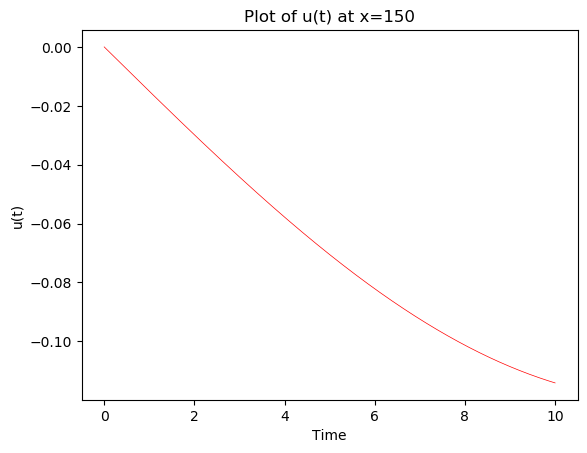

In [43]:
#One-point plot
y1=zeros(length(sol.t))
x1=sol.t
z=collect(0:N)
#Plotting the trajectory of fifth lattice point
for it in 1:length(sol.u)
    y1[it] = y1[it]+(real(sol[it][150,2]))
end
        
    using PyPlot
    plt.figure(3)    
    plt.plot(x1, y1, color="red", linewidth=0.5)
    title("Plot of u(t) at x=150")
    xlabel("Time")
    #xlim(0,0.02)
    #ylim(...,...)
    ylabel("u(t)")
    plt.show()

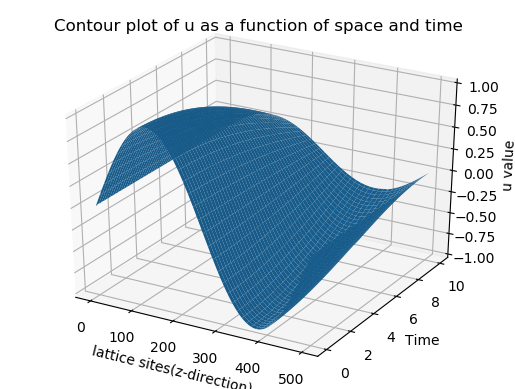

PyObject Text(0.5, 0.92, 'Contour plot of u as a function of space and time')

In [44]:
N=500
t_end=20
z_plot=collect(0:1:N)
times=collect(0:0.01:10.01)
u_value=zeros(length(sol.t),N+1)
for iter in 1:N+1
    for iter2 in 1:length(sol.t)
        u_value[iter2,iter]=sol.u[iter2][iter,1]
    end
end
plot_surface(z_plot,times,u_value)
xlabel("lattice sites(z-direction)")
ylabel("Time")
zlabel("u value")
title("Contour plot of u as a function of space and time")
#xlim(200,300)
#ylim(10,20)

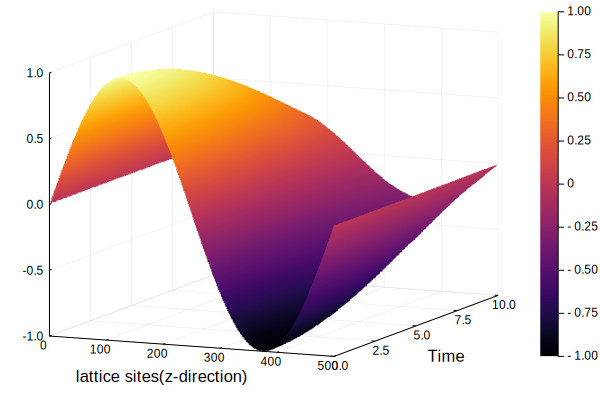

dvipng: PNG conversion failed
dvipng: PNG conversion failed
dvipng: PNG conversion failed
dvipng: PNG conversion failed


In [34]:
using Plots
    Plots.surface(z_plot,times,u_value,xlabel=("lattice sites(z-direction)"),ylabel=("Time"),zlabel=("Value of u "))


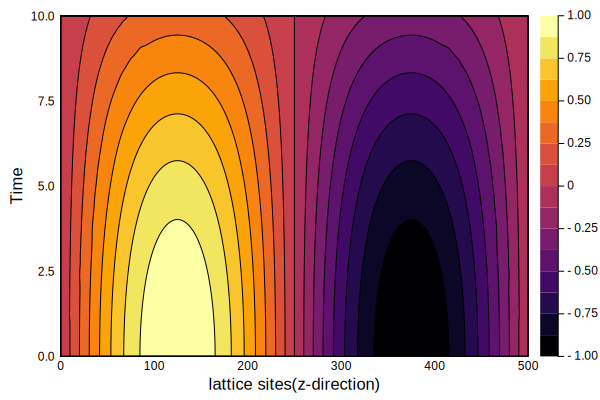

dvipng: PNG conversion failed
dvipng: PNG conversion failed
dvipng: PNG conversion failed


In [35]:
using Plots
    Plots.contour(z_plot,times,u_value,fill=true,xlabel=("lattice sites(z-direction)"),ylabel=("Time"),title=L"Contour plot of \phi as a function of space and time")
